$$
  f(x) = f(B,N,E,S)
  =
  \begin{pmatrix}
       (\mu_1(N)-D)\,B \\ 
       -k_1\,\mu_1(N)\,B+D\,(N_{in}-N)\\ 
       \mu_2(E,S)\,B-D\,E\\ 
       -k_2\,\mu_2(E,S)\,B+D\,(S_{in}-S)
  \end{pmatrix}
$$

\begin{align*}
  \mu_1(N) &= \mu_1^{max}\,\frac{N}{K_N+N}
  &
  \mu_2(E,S) &= \mu_2^{max}\,\frac{S}{K_S+S}\,\frac{K_E}{K_E+E}  
\end{align*}

 

0.0606 2.17 1.34 1.45 1.57 14.1 0.0154 2.0 0.42 190
0.0606 2.17 1.34 1.45 1.57 14.1 0.0154 2.0 0.42 190
0.0606 2.17 1.34 1.45 1.57 14.1 0.0154 2.0 0.42 190
0.0606 2.17 1.34 1.45 1.57 14.1 0.0154 2.0 0.42 190
0.0606 2.17 1.34 1.45 1.57 14.1 0.0154 2.0 0.42 190
0.0606 2.17 1.34 1.45 1.57 14.1 0.0154 2.0 0.42 190
0.0606 2.17 1.34 1.45 1.57 14.1 0.0154 2.0 0.42 190
0.0606 2.17 1.34 1.45 1.57 14.1 0.0154 2.0 0.42 190
0.0606 2.17 1.34 1.45 1.57 14.1 0.0154 2.0 0.42 190
0.0606 2.17 1.34 1.45 1.57 14.1 0.0154 2.0 0.42 190
0.0606 2.17 1.34 1.45 1.57 14.1 0.0154 2.0 0.42 190
0.0606 2.17 1.34 1.45 1.57 14.1 0.0154 2.0 0.42 190
0.0606 2.17 1.34 1.45 1.57 14.1 0.0154 2.0 0.42 190
0.0606 2.17 1.34 1.45 1.57 14.1 0.0154 2.0 0.42 190
0.0606 2.17 1.34 1.45 1.57 14.1 0.0154 2.0 0.42 190
0.0606 2.17 1.34 1.45 1.57 14.1 0.0154 2.0 0.42 190
0.0606 2.17 1.34 1.45 1.57 14.1 0.0154 2.0 0.42 190
0.0606 2.17 1.34 1.45 1.57 14.1 0.0154 2.0 0.42 190
0.0606 2.17 1.34 1.45 1.57 14.1 0.0154 2.0 0.42 190
0.0606 2.17 

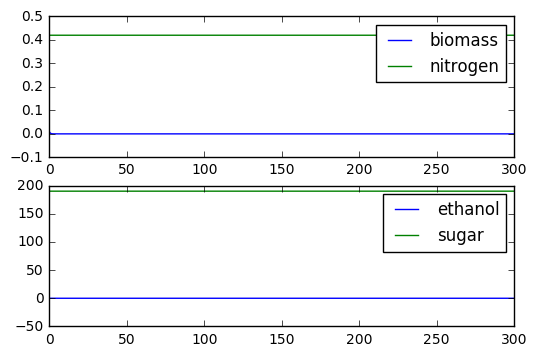

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def f(x,t,k1,k2,mu1max,mu2max,KN,KE,KS,D,Nin,Sin):
    print(k1,k2,mu1max,mu2max,KN,KE,KS,D,Nin,Sin)
    B, N, E, S = x # biomass, nitrogen, ethanol, sugar
    f = np.zeros(4) #derivative of B, N, E and S
    mu1 = mu1max*N/(KN+N)
    mu2 = mu2max*S/(KS+S)*KE/(KE+E)
    f1 = (mu1-D)*B
    f2 = -k1*mu1*B+D*(Nin-N)
    f3 = mu2*B-D*E
    f4 = -k2*mu2*B+D*(Sin-S)
    return f1,f2,f3,f4

k1, k2 = 0.0606, 2.17           # -
mu1max, mu2max = 1.34, 1.45     # 1/h
KN, KE, KS = 1.57, 14.1 ,0.0154 # g/L
Q = 1
V = 0.5
D = Q/V
Nin, Sin = 0.42, 190

x0 = np.array([0.01, Nin, 0, Sin])
t = np.arange(0,300,0.1)
y = odeint(f,x0,t,args=(k1,k2,mu1max,mu2max,KN,KE,KS,D,Nin,Sin))

f2, ax2 = plt.subplots(2,1)
ax2[0].plot(t,y[:,0:2])
ax2[0].legend(['biomass', 'nitrogen'])

ax2[1].plot(t,y[:,2:4])
ax2[1].legend(['ethanol', 'sugar'])

plt.show()

